# Movie Rating Prediction

In [30]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [31]:
#Importing dataset

df = pd.read_csv(r"C:\tel dataset\CodSoft\Movie Ratings.csv",encoding_errors='replace')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8.00,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35.00,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11.00,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655.00,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Describing dateset

df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [33]:
df.describe(include='object')

,Name,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,7240,13632,7920,14984,13892,13125,12365
unique,13838,182,485,2034,5938,4718,4891,4820
top,Anjaam,120 min,Drama,8.00,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,240,2780,227,58,158,83,91


In [34]:
#Necessary information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [35]:
df[["Duration","dura"]] = df["Duration"].str.split(" ",expand=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,dura
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,NaN
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8.00,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,min
2,#Homecoming,-2021.0,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,min
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35.00,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,min
4,...And Once Again,-2010.0,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,min
...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11.00,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,NaN
15505,Zulmi,-1999.0,129,"Action, Drama",4.5,655.00,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,min
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.drop("dura",axis=1,inplace=True)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8.00,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35.00,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11.00,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129,"Action, Drama",4.5,655.00,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#Shape of dataset

df.shape

(15509, 10)

In [38]:
#Missing values count in dataset

df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [39]:
df.dropna(inplace=True)
df=df.reset_index(drop=True)

In [40]:
df.drop("Year",axis=1)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8.00,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35.00,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827.00,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,1086.00,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326.00,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
5654,Zubaan,-2015.0,115,Drama,6.1,408.00,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
5655,Zubeidaa,-2001.0,153,"Biography, Drama, History",6.2,1496.00,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
5656,Zulm Ki Zanjeer,-1989.0,125,"Action, Crime, Drama",5.8,44.00,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5657,Zulmi,-1999.0,129,"Action, Drama",4.5,655.00,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [41]:
df["Genre"].unique()
df["Genre"].dtype

dtype('O')

In [42]:
df['Genre'] = [str(genre).lower().strip() for genre in df['Genre']]
df['Genre'] = [genre.strip().replace(' ,',',') for genre in df['Genre']]
print(df["Genre"].unique())

['drama' 'comedy, romance' 'comedy, drama, musical' 'drama, romance, war'
 'horror, mystery, thriller' 'action, crime, thriller' 'horror'
 'horror, romance, thriller' 'comedy, drama, romance' 'comedy, drama'
 'crime, drama, mystery' 'horror, thriller' 'comedy, horror'
 'drama, horror, mystery' 'action, thriller' 'action'
 'horror, mystery, romance' 'horror, mystery' 'drama, horror, romance'
 'action, drama, history' 'action, drama, war' 'thriller' 'comedy'
 'adventure, horror, mystery' 'action, sci-fi' 'crime, mystery, thriller'
 'drama, history' 'sport' 'biography, drama, history' 'horror, romance'
 'crime, drama' 'adventure, drama' 'comedy, mystery, thriller'
 'drama, romance' 'crime, thriller' 'horror, sci-fi, thriller'
 'drama, mystery, thriller' 'drama, family, musical' 'action, comedy'
 'action, adventure, fantasy' 'documentary' 'drama, horror, musical'
 'action, biography, drama' 'action, fantasy, mystery'
 'adventure, drama, mystery' 'mystery, thriller' 'comedy, crime, drama'
 

In [43]:
encoder=LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])

In [44]:
df['Director']=encoder.fit_transform(df['Director'])

In [45]:
df['Actor 1']=encoder.fit_transform(df['Actor 1'])
df['Actor 2']=encoder.fit_transform(df['Actor 2'])
df['Actor 3']=encoder.fit_transform(df['Actor 3'])

In [46]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),-2019.0,109,229,7.0,8.00,629,1352,2272,319
1,#Yaaram,-2019.0,110,184,4.4,35.00,1335,1198,719,2148
2,...Aur Pyaar Ho Gaya,-1997.0,147,157,4.7,827.00,1530,378,75,2045
3,...Yahaan,-2005.0,142,289,7.4,1086.00,2044,692,1112,2524
4,?: A Question Mark,-2012.0,82,320,5.6,326.00,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...,...
5654,Zubaan,-2015.0,115,229,6.1,408.00,1223,1861,1801,1615
5655,Zubeidaa,-2001.0,153,133,6.2,1496.00,2059,763,1619,1184
5656,Zulm Ki Zanjeer,-1989.0,125,28,5.8,44.00,1793,406,754,1685
5657,Zulmi,-1999.0,129,38,4.5,655.00,1025,112,2164,314


In [47]:
x=df.drop("Rating",axis=1)
x=df.drop("Name",axis=1)
w=df['Rating']
x_train,x_test,w_train,w_test = train_test_split(x,w,test_size=0.2,random_state=42)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(w_train.shape)
print(w_test.shape)

(4527, 9)
(1132, 9)
(4527,)
(1132,)


In [49]:
model=KNeighborsRegressor(n_neighbors=5,metric='euclidean')

In [50]:
model.fit(x_train,w_train)

KNeighborsRegressor(metric='euclidean')

In [51]:
w_pred = model.predict(x_test)
w_pred

array([5.18, 6.34, 5.46, ..., 6.44, 6.  , 5.22])

In [52]:
MSE = mean_squared_error(w_test,w_pred)
print(MSE)

1.9362766784452299


# Prediction in Visualization

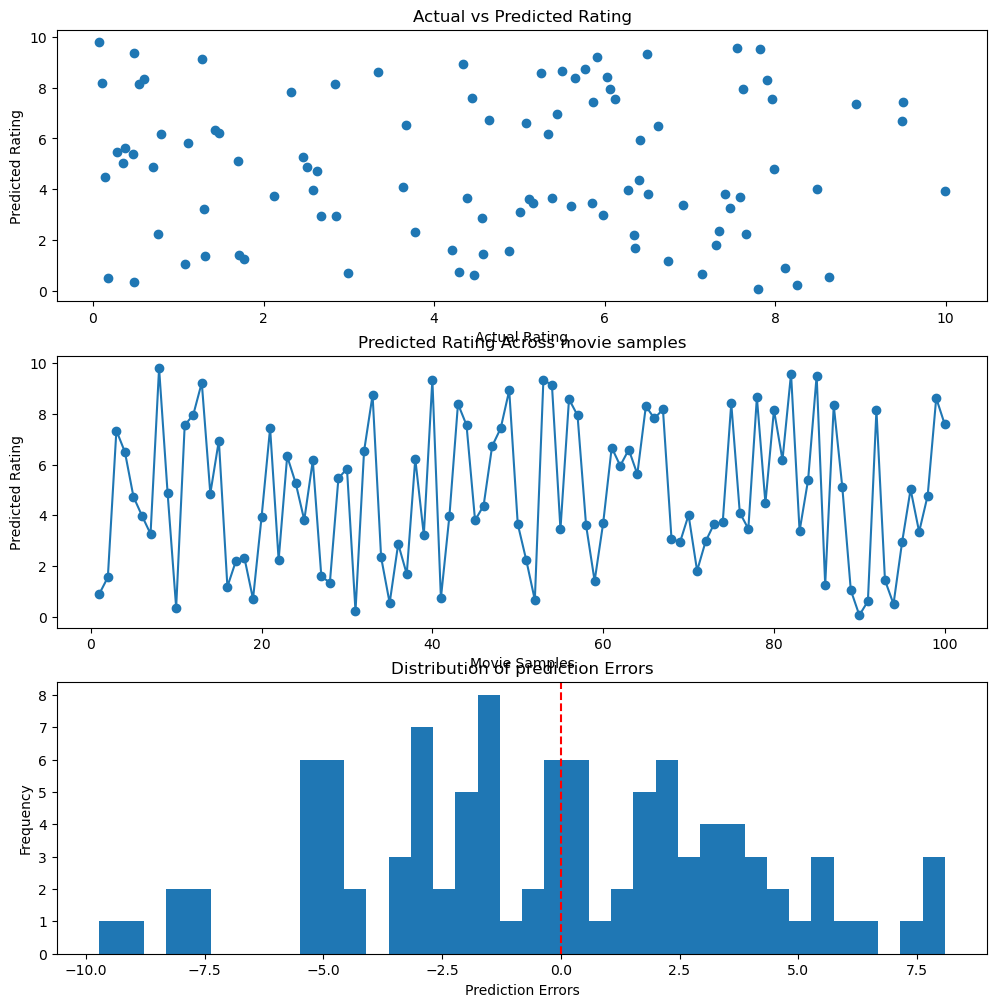

In [53]:
y_test = np.random.rand(100)*10
y_pred = np.random.rand(100)*10
errors = y_test-y_pred
fig,axis = plt.subplots(3,1,figsize=(12,12))
axis[0].scatter(y_test,y_pred)
axis[0].set_xlabel("Actual Rating")
axis[0].set_ylabel("Predicted Rating")
axis[0].set_title("Actual vs Predicted Rating")
samp = np.arange(1,len(y_pred)+1)
axis[1].plot(samp,y_pred,marker='o',linestyle='-')
axis[1].set_xlabel("Movie Samples")
axis[1].set_ylabel("Predicted Rating")
axis[1].set_title("Predicted Rating Across movie samples")
axis[2].hist(errors,bins=38)
axis[2].set_xlabel("Prediction Errors")
axis[2].set_ylabel("Frequency")
axis[2].set_title("Distribution of prediction Errors")
axis[2].axvline(x=0,color="r",linestyle='--')
plt.show()